In [13]:
import numpy as np
import pandas as pd
import os
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import stop_words
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_session_data(ses_names): 
    """
    Given a list of session names, opens all session folders and
    saves all txt files, country names and session years
    into three lists.
    """
    path = os.getcwd()  
    all_sessions = []
    all_countries = []
    years = []
    for session in ses_names:
        sessions = []
        countries = []
        f_path = os.path.join(path,session)
        years.append(int(f_path[-4:]))
        files = os.listdir(f_path)
        for file in files:
             if file.endswith('.txt'):
                with open(os.path.join(f_path,file), 'r', encoding='utf-8') as f:
                    countries.append(file.split('_')[0])
                    sessions.append(f.read())
        all_sessions.append(sessions)
        all_countries.append(countries)

    return all_sessions, all_countries, years 

In [4]:
# Get the names of all sessions in the current directory
ses_names = [filename for filename in os.listdir() if filename.startswith('Session')]
ses_names[:5]

['Session 29 - 1974',
 'Session 50 - 1995',
 'Session 64 - 2009',
 'Session 51 - 1996',
 'Session 27 - 1972']

In [5]:
all_sessions, all_countries, years = get_session_data(ses_names)

In [6]:
print('Total number of sessions is ', len(all_sessions))
print('Number of countries in General Debate in',years[0], 'is', len(all_sessions[0]))

Total number of sessions:  49
Number of countries in General Debate in 1974 is 129


## TFIDF 

In [130]:
un_stop_words = ['international','organization', 'general', 'assembly', 'year', 'right',
                 'government', 'session','united', 'nations', 'world', 'countries','country', 'state',
                 'states', 'human', 'community']

st_words = list(stop_words.ENGLISH_STOP_WORDS) + un_stop_words
tfidf = TfidfVectorizer(stop_words=st_words)
X = tfidf.fit_transform(combined_ses)
feature_names= tfidf.get_feature_names()

In [131]:
X.shape   # 49 corresponds to the number of documents, and 56111 to the total vocabulary size.

(49, 56111)

In [177]:
def compute_tfidf_scores(doc, n_words):
    """
    Given a document, computes the tfidf matrix for
    that document and returns  a list of 30 words with the highest
    tfidf scores in descending order of importance.
    """
    y=tfidf.transform([doc])
    scores=[]
    for col in y.nonzero()[1]:
        scores.append((feature_names[col], float((y[0, col]))))
    sorted_scores = sorted(scores, key=lambda x: x[1],
                           reverse = True)
    top_words = []
    
    for i in range(n_words):
        top_words.append(sorted_scores[i][0])
    return top_words

In [182]:
top_words = []
for ses in combined_ses:
    top_words.append(compute_tfidf_scores(ses, 30))

In [184]:
top_words

[['economic',
  'peace',
  'people',
  'new',
  'development',
  'peoples',
  'developing',
  'security',
  'problems',
  'order',
  'national',
  'africa',
  'political',
  'time',
  'conference',
  'delegation',
  'independence',
  'situation',
  'great',
  'efforts',
  'relations',
  'operation',
  'special',
  'problem',
  'republic',
  'rights',
  'cyprus',
  'resources',
  'nuclear',
  'east'],
 ['peace',
  'development',
  'security',
  'economic',
  'new',
  'council',
  'people',
  'rights',
  'nuclear',
  'efforts',
  'social',
  'political',
  'cooperation',
  'years',
  'war',
  'support',
  'time',
  'work',
  'boutros',
  'process',
  'important',
  'member',
  'conference',
  'fiftieth',
  'region',
  'weapons',
  'order',
  'like',
  'africa',
  'national'],
 ['09',
  'development',
  'security',
  'global',
  'economic',
  'peace',
  'change',
  'people',
  'crisis',
  'climate',
  'new',
  'support',
  'efforts',
  'financial',
  'council',
  'president',
  'challenge

In [185]:
def filter_digits(list):
    """
    Given as list of words, filter out
    numbers
    """
    reg = re.compile('^\d+')
    new_list = []
    for e in list:
        if not reg.match(e):
            new_list.append(e)
            
    return new_list[:20]
 

In [ ]:
def create_df(ll_words):
    """
    Given a nested list of most important words,
    create a dataframe to display results for 
    each year
    """
    df = pd.DataFrame()

    min_year = min(years)
    max_year = max(years)
    for i in range(min_year, max_year + 1):
        col = str(i)
        idx = years.index(i)
        df[col] = ll_words[idx]

    return df 

In [186]:
filtered_words = []
for ses in top_words: 
    filtered_words.append(filter_digits(ses))
    
df = create_df(filtered_words)


In [193]:
df.iloc[:5,:].T

,0,1,2,3,4
1970,peace,people,development,security,peoples
1971,peace,people,development,security,republic
1972,peace,people,security,development,peoples
1973,peace,people,security,economic,development
1974,economic,peace,people,new,development
1975,peace,economic,people,new,security
1976,people,economic,peace,africa,new
1977,economic,people,peace,new,rights
1978,peace,economic,people,new,rights
1979,people,peace,economic,new,development


##  WORD CLOUD

In [196]:
# Flattening the nested lists to pass to wordcloud function
combined_ses = []
for s in all_sessions:
    combined= '. '.join(s)
    combined_ses.append(combined)

In [194]:
# Generate word cloud
def create_w_cloud(text):
    wc = WordCloud(
        stopwords = st_words, 
        min_font_size = 10,
        background_color ='white').generate(text)
    plt.figure(figsize = (8, 8)) 
    plt.imshow(wc) 
    plt.axis("off")
    plt.tight_layout(pad=0) 

    plt.show() 

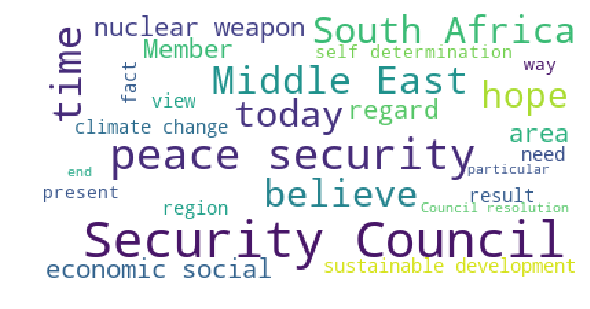

In [195]:
create_w_cloud('.'.join(combined_ses))